In [41]:
import operator
import requests
from collections import defaultdict
import matplotlib.pyplot as plt

In [47]:
# Getting the list of birds:
page = requests.get('http://www.californiabirds.org/main_list.txt')
birds_text = page.text
birds_list = birds_text.split('\n')

In [43]:
# Cleaning the list of birds:
clean_birds = []

for bird in birds_list:
    if bird.find('(') > -1:
        bird = bird[0:bird.find('(')].rstrip()
    if len(bird) - len(bird.lstrip()) == 2:
        clean_birds = clean_birds + [bird.lstrip().lower()]
sorted(set(clean_birds))

["abert's towhee",
 'acorn woodpecker',
 'alder flycatcher',
 "allen's hummingbird",
 'american avocet',
 'american bittern',
 'american black duck',
 'american coot',
 'american crow',
 'american dipper',
 'american golden-plover',
 'american goldfinch',
 'american kestrel',
 'american oystercatcher',
 'american pipit',
 'american redstart',
 'american robin',
 'american tree sparrow',
 'american white pelican',
 'american wigeon',
 'american woodcock',
 'ancient murrelet',
 'anhinga',
 "anna's hummingbird",
 'arctic loon',
 'arctic tern',
 'arctic/kamchatka leaf warbler',
 'ash-throated flycatcher',
 'ashy storm-petrel',
 'baikal teal',
 "baird's sandpiper",
 "baird's sparrow",
 'bald eagle',
 'baltimore oriole',
 'band-tailed pigeon',
 'bank swallow',
 'bar-tailed godwit',
 'barn owl',
 'barn swallow',
 'barred owl',
 "barrow's goldeneye",
 'bay-breasted warbler',
 "belcher's gull",
 "bell's sparrow",
 "bell's vireo",
 'belted kingfisher',
 "bendire's thrasher",
 "bewick's wren",
 '

In [44]:
# List of colors that appear in bird names
color_list = ('blue', 'yellow', 'green', 'red', 'black', 'gray', 'purple', 'teal',
              'white', 'olive',)

In [48]:
# Makes a dictionary of birds by color in name (color : color count)
colored_birds = defaultdict(list)
for count, bird in enumerate(clean_birds):
    for color in color_list:
        if color in bird:
            if color in colored_birds:
                colored_birds[color] += 1
            else:
                colored_birds[color] = 1

sorted_colored_birds = sorted(colored_birds.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_colored_birds)  # Sort in descending order

[('black', 44), ('red', 41), ('white', 23), ('yellow', 19), ('blue', 15), ('gray', 12), ('green', 8), ('teal', 4), ('purple', 4), ('olive', 2)]


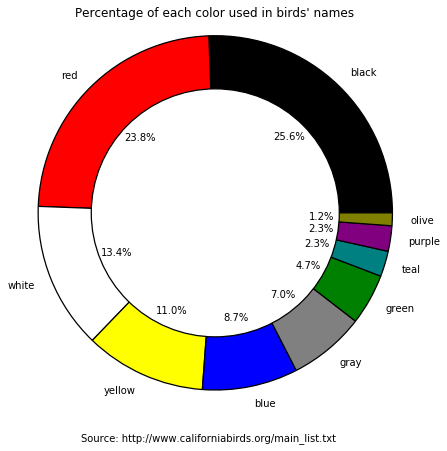

In [49]:
# Plot number of birds by color in name
labels, sizes = zip(*sorted_colored_birds)
colors = labels # The labels are the colors in bird's names
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        wedgeprops={'edgecolor':'black', 'linewidth':1.25}, shadow=False)
# Inner circle is a white circle overlayed on the pie chart to make a donut plot
inner_circle = plt.Circle((0, 0), 0.70, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(inner_circle)
plt.axis('equal')
plt.title("Percentage of each color used in birds' names")
caption = "Source: http://www.californiabirds.org/main_list.txt"
fig.text(0.5, 0.05, caption, ha='center')
plt.rcParams["figure.figsize"] = [7,7]
plt.show()